In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1 初始化模型参数

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

In [4]:
W1 = nn.Parameter(torch.randn([num_inputs, num_hiddens], requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn([num_hiddens, num_outputs], requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [5]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3 模型

In [6]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(X @ W1 + b1)
    return H @ W2 + b2

### 4.2.4 损失函数

In [7]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5 训练

In [8]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)

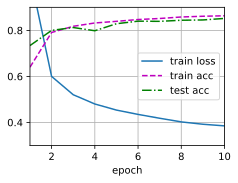

In [9]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

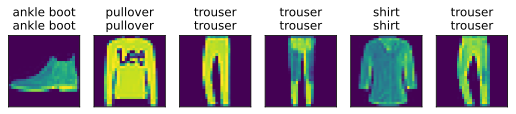

In [10]:
d2l.predict_ch3(net, test_iter)